# Examples 2
Some additional examples to demonstrate the use of the HYPEHD package. The test dataset is open source data from [https://github.com/insightsengineering/scda.2022](https://github.com/insightsengineering/scda.2022) website.

In [1]:
%%capture
%pip install --index-url https://test.pypi.org/simple/ --extra-index-url https://pypi.org/simple hypehd

## Imports

In [2]:
from hypehd import visualization as vis
from hypehd import data_manipulation as da
import hypehd

## Reading the data

In [3]:
# read into dataframe dm from package
my_file = hypehd.PACKAGEDIR / 'data' / 'demographic.csv'
dm=da.read("csv", my_file)
dm.head()

,Unnamed: 0,STUDYID,USUBJID,SUBJID,SITEID,AGE,AGEU,SEX,RACE,ETHNIC,...,DCSREAS,DTHDT,DTHCAUS,DTHCAT,LDDTHELD,LDDTHGR1,LSTALVDT,DTHADY,ADTHAUT,study_duration_secs
0,1,AB12345,AB12345-CHN-3-id-128,id-128,CHN-3,32,YEARS,M,ASIAN,HISPANIC OR LATINO,...,DEATH,2022-03-06,ADVERSE EVENT,ADVERSE EVENT,22.0,<=30,2022-03-06,1106.0,Yes,63113904
1,2,AB12345,AB12345-CHN-15-id-262,id-262,CHN-15,35,YEARS,M,BLACK OR AFRICAN AMERICAN,NOT HISPANIC OR LATINO,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-17,NaN,NaN,63113904
2,3,AB12345,AB12345-RUS-3-id-378,id-378,RUS-3,30,YEARS,F,ASIAN,NOT HISPANIC OR LATINO,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-11,NaN,NaN,63113904
3,4,AB12345,AB12345-CHN-11-id-220,id-220,CHN-11,26,YEARS,F,ASIAN,NOT HISPANIC OR LATINO,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-26,NaN,NaN,63113904
4,5,AB12345,AB12345-CHN-7-id-267,id-267,CHN-7,40,YEARS,M,ASIAN,NOT HISPANIC OR LATINO,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-15,NaN,NaN,63113904


## Checking data null bias

You will need to check the bias in your data sometimes and some forms of bias checking are to be done manually but our package offers two forms of automated bias checking. To find columns with too much missing data and to check to see if the distribution of discrete data is as intended. <br>
Here, we have checked the columns for too much missing data, in other words, columns that have too many null values. This is done using the ``check_bias`` function.

In [4]:
too_null_1 = da.check_bias(dm)

Columns with too many null values: 
 [['TRTEDTM', 73], ['TRT01EDTM', 73], ['TRT02SDTM', 73], ['TRT02EDTM', 73], ['AP01EDTM', 73], ['AP02SDTM', 73], ['AP02EDTM', 73], ['EOSDT', 73], ['EOSDY', 73], ['DCSREAS', 280], ['DTHDT', 330], ['DTHCAUS', 330], ['DTHCAT', 330], ['LDDTHELD', 330], ['LDDTHGR1', 330], ['LSTALVDT', 73], ['DTHADY', 330], ['ADTHAUT', 343]]


## Dealing with too many null values

For this you can either remove the column with too many null values which is done later in this example file, or you can impute the missing data using the ``handle_null`` function which also gives the option to remove the rows with the missing values.<br>
Here, we have removed the row with null values in columns that had too many nulls.

In [5]:
# make copy of unhandled version for future use
dm_uncleaned = dm.copy()

# remove rows with null values from columns that have too many nulls
for null in too_null_1[0]:
    dm = da.handle_null(dm, null[0], impute_type="remove")
dm.head()

,Unnamed: 0,STUDYID,USUBJID,SUBJID,SITEID,AGE,AGEU,SEX,RACE,ETHNIC,...,DCSREAS,DTHDT,DTHCAUS,DTHCAT,LDDTHELD,LDDTHGR1,LSTALVDT,DTHADY,ADTHAUT,study_duration_secs
0,1,AB12345,AB12345-CHN-3-id-128,id-128,CHN-3,32,YEARS,M,ASIAN,HISPANIC OR LATINO,...,DEATH,2022-03-06,ADVERSE EVENT,ADVERSE EVENT,22.0,<=30,2022-03-06,1106.0,Yes,63113904
5,6,AB12345,AB12345-CHN-15-id-201,id-201,CHN-15,49,YEARS,M,ASIAN,NOT HISPANIC OR LATINO,...,DEATH,2022-02-22,ADVERSE EVENT,ADVERSE EVENT,3.0,<=30,2022-02-22,1085.0,Yes,63113904
12,13,AB12345,AB12345-RUS-1-id-52,id-52,RUS-1,40,YEARS,F,ASIAN,NOT HISPANIC OR LATINO,...,DEATH,2022-02-20,DISEASE PROGRESSION,PROGRESSIVE DISEASE,7.0,<=30,2022-02-20,1070.0,Yes,63113904
16,17,AB12345,AB12345-BRA-11-id-9,id-9,BRA-11,40,YEARS,M,ASIAN,NOT HISPANIC OR LATINO,...,DEATH,2022-03-20,DISEASE PROGRESSION,PROGRESSIVE DISEASE,36.0,>30,2022-03-20,1091.0,Yes,63113904
18,19,AB12345,AB12345-CHN-15-id-245,id-245,CHN-15,34,YEARS,F,WHITE,NOT HISPANIC OR LATINO,...,DEATH,2022-02-18,DISEASE PROGRESSION,PROGRESSIVE DISEASE,1.0,<=30,2022-02-18,1057.0,Yes,63113904


## Adding categories for a numerical column

You can change unumerical values to categorical ones useing the ``numeric_to_categorical`` function. Here we have changed <strong><em>AGE</em></strong> into categories.
You can replace the previous column or create a new column for your categorical data, we have used True to indicate a new column called <strong><em>AGE_group</em></strong>.

In [6]:
dm = da.numeric_to_categorical(dm, 'AGE', [[30, '(,30]'], [35, '(30,35]'], 
                                        [40, '(35,40]'], [45, '(40,45]'],
                                        [50, '(45,50]']], True)
dm.head()

,Unnamed: 0,STUDYID,USUBJID,SUBJID,SITEID,AGE,AGEU,SEX,RACE,ETHNIC,...,DTHDT,DTHCAUS,DTHCAT,LDDTHELD,LDDTHGR1,LSTALVDT,DTHADY,ADTHAUT,study_duration_secs,AGE_group
0,1,AB12345,AB12345-CHN-3-id-128,id-128,CHN-3,32,YEARS,M,ASIAN,HISPANIC OR LATINO,...,2022-03-06,ADVERSE EVENT,ADVERSE EVENT,22.0,<=30,2022-03-06,1106.0,Yes,63113904,"(30,35]"
5,6,AB12345,AB12345-CHN-15-id-201,id-201,CHN-15,49,YEARS,M,ASIAN,NOT HISPANIC OR LATINO,...,2022-02-22,ADVERSE EVENT,ADVERSE EVENT,3.0,<=30,2022-02-22,1085.0,Yes,63113904,"(45,50]"
12,13,AB12345,AB12345-RUS-1-id-52,id-52,RUS-1,40,YEARS,F,ASIAN,NOT HISPANIC OR LATINO,...,2022-02-20,DISEASE PROGRESSION,PROGRESSIVE DISEASE,7.0,<=30,2022-02-20,1070.0,Yes,63113904,"(35,40]"
16,17,AB12345,AB12345-BRA-11-id-9,id-9,BRA-11,40,YEARS,M,ASIAN,NOT HISPANIC OR LATINO,...,2022-03-20,DISEASE PROGRESSION,PROGRESSIVE DISEASE,36.0,>30,2022-03-20,1091.0,Yes,63113904,"(35,40]"
18,19,AB12345,AB12345-CHN-15-id-245,id-245,CHN-15,34,YEARS,F,WHITE,NOT HISPANIC OR LATINO,...,2022-02-18,DISEASE PROGRESSION,PROGRESSIVE DISEASE,1.0,<=30,2022-02-18,1057.0,Yes,63113904,"(30,35]"


## Plotting the distribution of a demographic feature

You can create a pie chart to show the distribution a discrete variable using the ``pie`` function. If you want to save it, specify the path. If you use <strong>"."</strong> it will be saved in the same directory as your code file.

([<matplotlib.patches.Wedge at 0x7fde9d411580>,
 [Text(0.5320908144466622, 0.9627457427490853, '(35,40]'),
  Text(-1.084458100654201, 0.18425696167440575, '(,30]'),
  Text(-0.30451921808270677, -1.0570090093363902, '(30,35]'),
  Text(0.7778173500684047, -0.7778175685419846, '(40,45]'),
  Text(1.084458098497778, -0.18425697436619265, '(45,50]')],
 [Text(0.290231353334543, 0.525134041499501, '33.9%\n19'),
  Text(-0.5915226003568368, 0.10050379727694858, '26.8%\n15'),
  Text(-0.16610139168147642, -0.57655036872894, '19.6%\n11'),
  Text(0.4242640091282207, -0.42426412829562793, '14.3%\n8'),
  Text(0.5915225991806061, -0.10050380419974143, '5.4%\n3')])

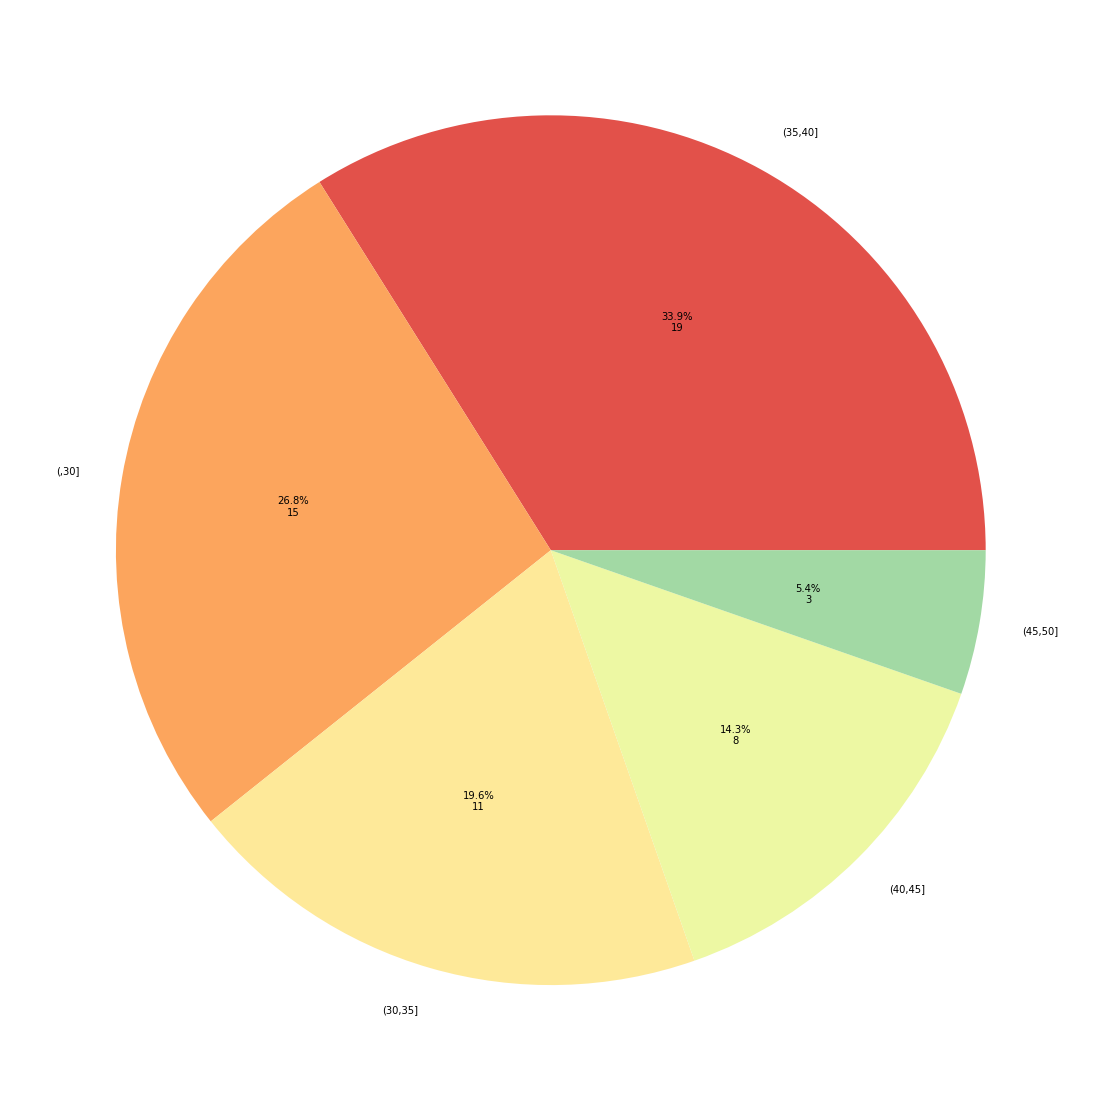

In [7]:
vis.pie(df = dm, col = "AGE_group",path = ".", name = "age_pie_chart")

## Plotting a boxplot grid

You can plot a boxplot grid of either three features (one numeric and two categorical) or of all numeric features using the ``boxplot_grid`` function.<br>
Here we have plotted <strong><em>AGE</em></strong> by <strong><em>SEX</em></strong> and <strong><em>COUNTRY</em></strong>.

/Users/wangjiayi/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


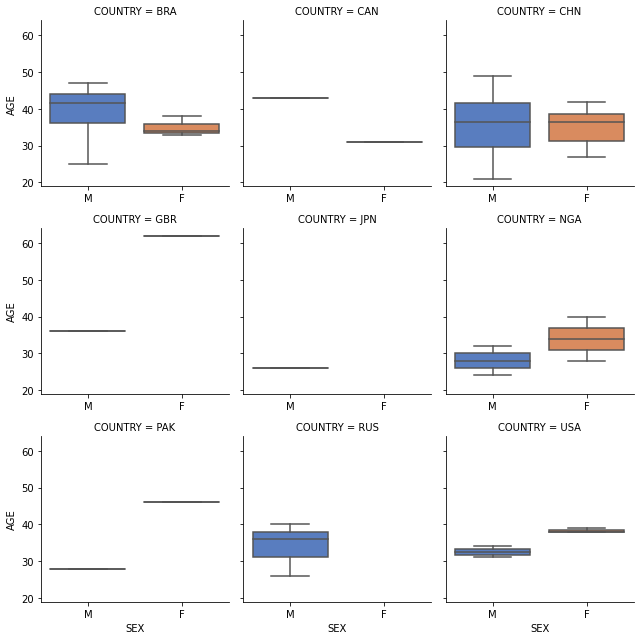

In [8]:
vis.boxplot_grid(dm, col1='COUNTRY', col2='SEX', col3='AGE')

## Generate demographic plots

There is another function can help users exploring the distribution and description statics of both continuous and discrete variables simultaneously using `demo_graph()` function. Here generates plots of AGE, SEX by different treatment group.

([<Figure size 1080x720 with 1 Axes>, <Figure size 1080x720 with 1 Axes>],
 [<AxesSubplot: title={'center': 'Plot and summary table for Age'}, ylabel='AGE'>,
  <AxesSubplot: title={'center': 'Plot and summary table for Sex'}, ylabel='SEX'>])

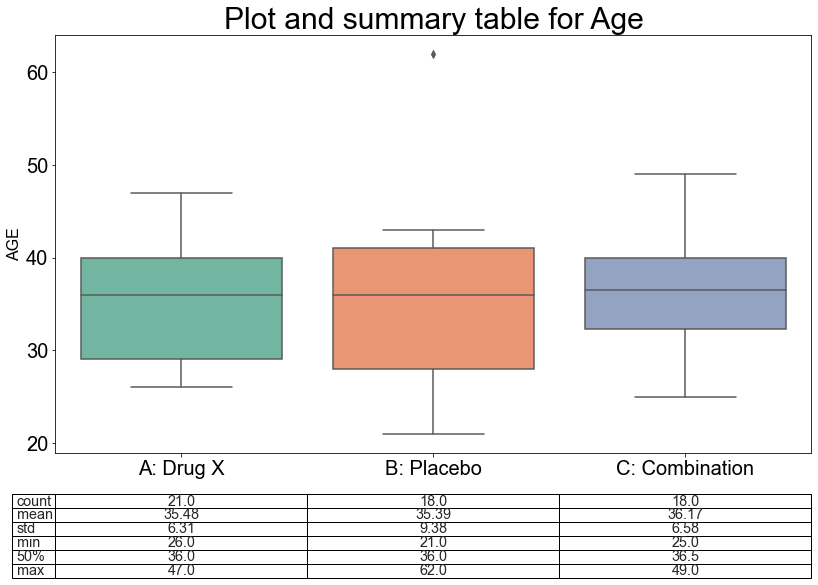

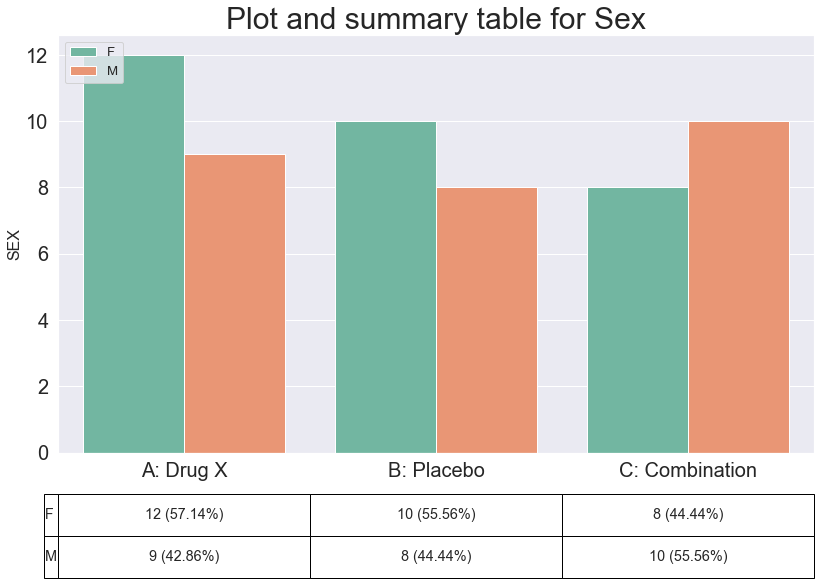

In [9]:
vis.demo_graph(var=["AGE", "SEX"], input_data=dm, group='TRT01P')

## Plotting 3D clusters

You can find and plot the clusters between three numerical features using the ``cluster_3d`` function and you can choose your prefered clustering method out of the options available. 
<br>Here, we have plotted a three dimentional cluster graph of <strong><em>AGE</em></strong>, <strong><em>BMRKR1</em></strong> and <strong><em>study_duration_secs</em></strong> using <strong>k-means</strong> clustering.<br>
If you only want a 3D graph without the clustering, you can use the ``graph_3d`` function.

(<Figure size 864x864 with 1 Axes>,
 <Axes3DSubplot: xlabel='Age', ylabel='BMRKR1', zlabel='Study duration (s)'>)

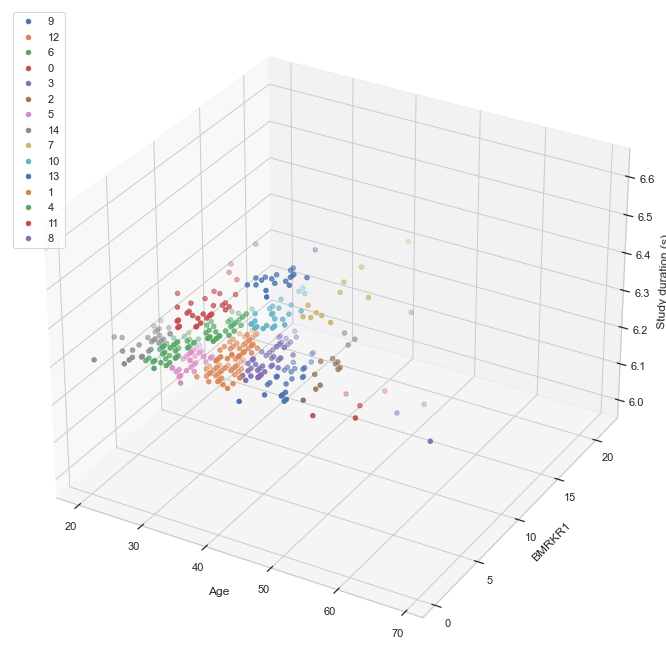

In [10]:
vis.cluster_3d(df=dm_uncleaned, cols=['AGE','BMRKR1','study_duration_secs'],
               lab1 = 'Age', lab3='Study duration (s)', c_type="k-means", legend=True)

## Plotting 2D clusters

For two dimentional clustering you can use the ``cluster_2d`` function in a similar fashion to the three dimentional function.<br>
We have plotted a two dimentional cluster graph of <strong><em>AGE</em></strong> and <strong><em>BMRKR1</em></strong> with <strong>DBSCAN</strong> clustering.

(<Figure size 864x864 with 1 Axes>,
 <AxesSubplot: xlabel='AGE', ylabel='BMRKR1'>)

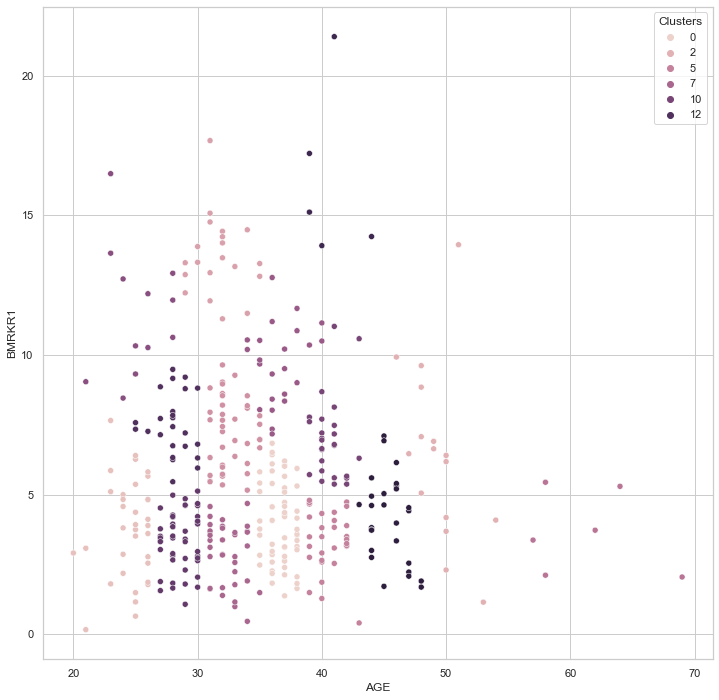

In [11]:
vis.cluster_2d(df=dm_uncleaned, cols=['AGE','BMRKR1'], c_type="dbscans", min_sample=10)

## Change data type

You can change a column's data type between <strong>String, Integer and Float</strong> types using the ``change_type`` function. <br>
Here we have changed <strong><em>BMRKR1</em></strong> from float to int.

In [12]:
dm_uncleaned = da.change_type(dm_uncleaned, 'BMRKR1', int)

## Add a numeric coded column from a categorical column

The ``categorical_to_numeric`` function changes numerical data columns to categorical ones. Here we changed the <strong><em>SEX</em></strong> column in the <strong><em>dm_uncleaned</em></strong> dataset to 0 and 1 and added the values into a separate column (<em>SEX_goup</em>) by setting add to True, if we use False it will replace the previous values within the SEX column.

In [13]:
dm_uncleaned = da.categorical_to_numeric(dm_uncleaned, 'SEX', [['F', 0],['M', 1]], True)

## Plotting the relationship between some cloumns

You can plot the relationship between columns using the ``relation`` function. It will return one or two heatmaps depending on the input. For categorical data, it will plot a heatmap of <strong><em>chi-square</em></strong> values. For numerical data, it will show the <strong><em>correlation</em></strong>. <br>
Here, we have removed columns with too many null values and have used the ``data-selection`` function to select some columns to plot and then plotted the relationship heatmaps.

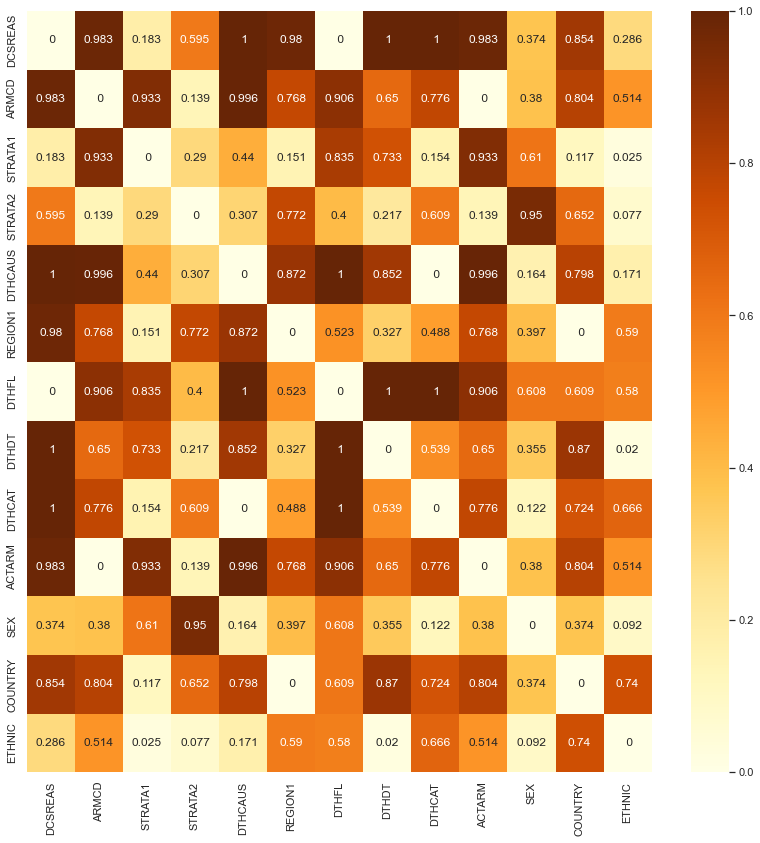

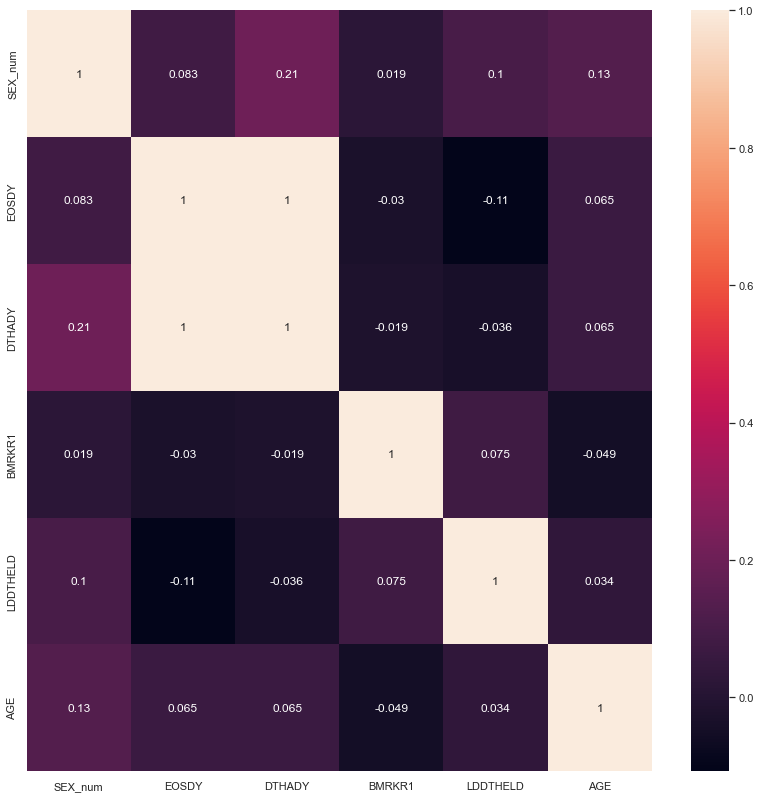

[[<Figure size 1008x1008 with 2 Axes>, <AxesSubplot: >], <AxesSubplot: >]

In [14]:
# removing all columns with too many null values
for null in too_null_1[0]:
    dm_no_too_null = dm_uncleaned.drop(null[0], axis=1)

# choosing columns to plot
dm_no_too_null = da.data_selection(keep_col=["STRATA1", "ARMCD", "STRATA2", "SEX_num", "EOSDY",
                                             "REGION1", "ACTARM", "DCSREAS", "DTHADY", "BMRKR1",
                                             "DTHDT", "DTHFL", "SEX", "COUNTRY", "LDDTHELD",
                                             "ETHNIC", "DTHCAT", "DTHCAUS", "AGE"],
                                              input_data=dm_no_too_null)
# drawing the relationship plot 
vis.relation(dm_no_too_null, path='.')